# TIME SERIES ANALYSIS


## Time series plot for Raw data

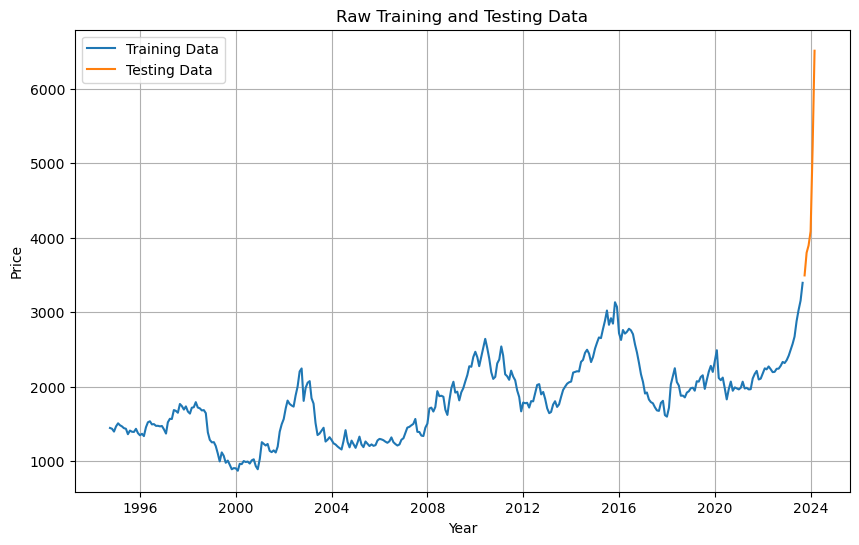

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('CocoaPrice.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Split the data into training and testing sets
train = data.loc[:'2023-09']
test = data.loc['2023-10':'2024-03']

# Plot the training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price'], label='Training Data')
plt.plot(test.index, test['Price'], label='Testing Data')
plt.title('Raw Training and Testing Data')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



## Naive forecast

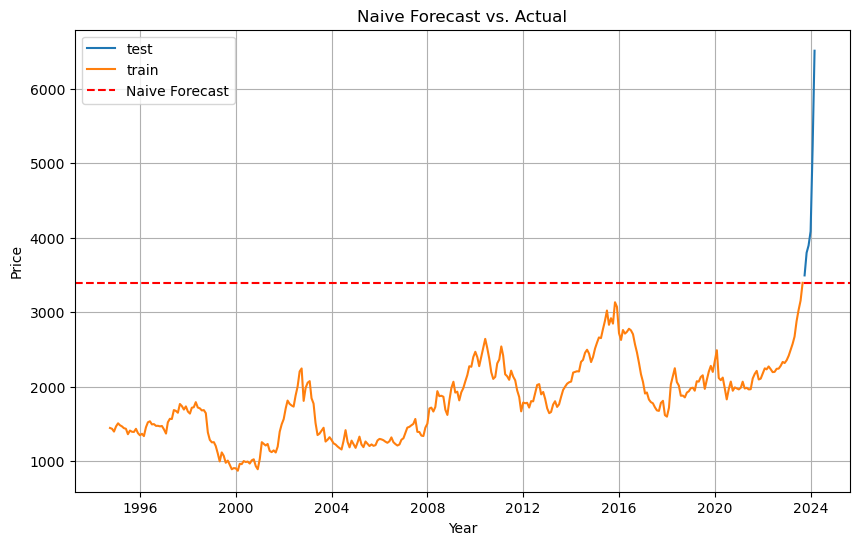

In [3]:
# set the last value as the forecast value
naive_forecast = train['Price'].iloc[-1]
# Plot Naive Forecast vs. Actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='test')
plt.plot(train.index, train['Price'], label='train')
plt.axhline(y=naive_forecast, color='r', linestyle='--', label='Naive Forecast')
plt.title('Naive Forecast vs. Actual')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Simple Moving Average(SMA) forecasting

              Price        sma
Date                          
2023-10-01  3495.03  3269.0050
2023-11-01  3799.15  3461.6900
2023-12-01  3897.04  3646.7000
2024-01-01  4087.54  3819.6900
2024-02-01  5226.12  4252.4625
2024-03-01  6510.16  4930.2150
MSE is  623935.9034427083
RMSE: 789.896134591573


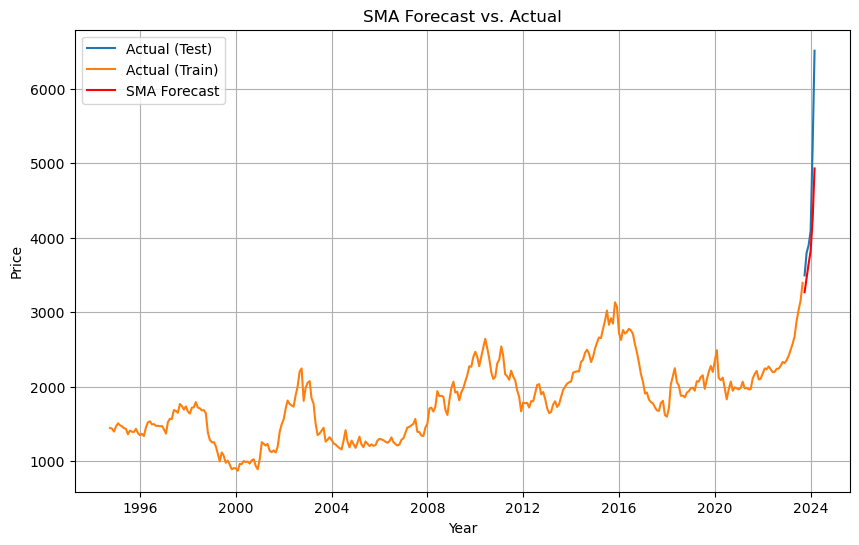

In [4]:
# defining sma values
data['sma'] = data['Price'].rolling(window=4).mean()

#splitting the data into test and training data
train = data.loc[:'2023-09']
test = data.loc['2023-10':'2024-03']

print(test)
# Plot Simple Moving Average (SMA) Forecast vs. Actual
plt.figure(figsize=(10, 6))

# mean squared error to get the accuracy
mse = mean_squared_error(test['Price'], test['sma'])
print("MSE is ",mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#plotting the graph
plt.plot(test.index, test['Price'], label='Actual (Test)')
plt.plot(train.index, train['Price'], label='Actual (Train)')
plt.plot(test.index, test["sma"], label='SMA Forecast', color='r')
plt.title('SMA Forecast vs. Actual')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Simple Exponential Smoothing forecasting

Forecasted Prices:
2023-10-01    4101.05
2023-11-01    4101.05
2023-12-01    4101.05
2024-01-01    4101.05
2024-02-01    4101.05
2024-03-01    4101.05
Freq: MS, dtype: float64
mse: 1261633.3246000006
RMSE: 1123.2245210108265


C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vishw\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


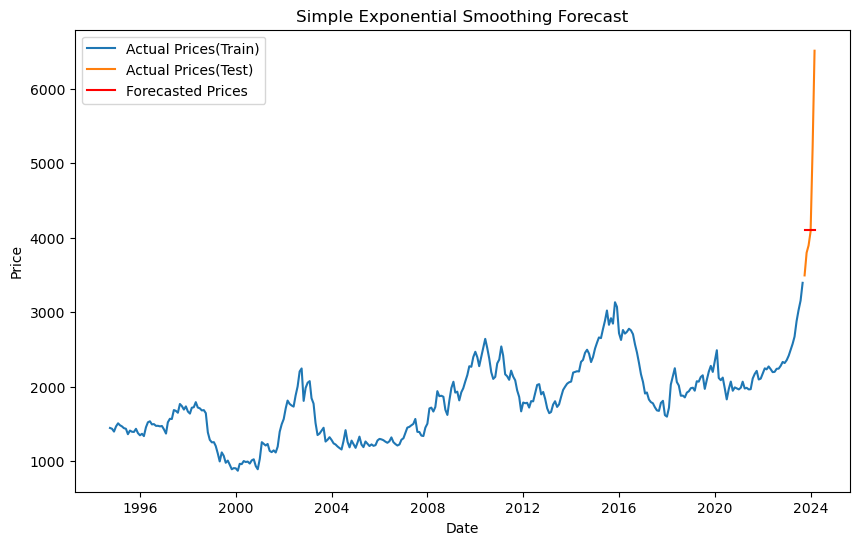

In [5]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


# Sort the data by date
data.sort_index(inplace=True)


#split the data into train and testing 
train = data.loc[:'2023-09']
test = data.loc['2023-10':'2024-03']

# Define the smoothing parameter (alpha)
alpha = 2.0

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(train['Price'])
result = model.fit(smoothing_level=alpha, optimized=True)  # Optimize can be set to True for automatic optimization of alpha

# Generate forecasts
# forcast period is the Number of periods into the future you want to forecast
forecast_period = 6 
forecast = result.forecast(forecast_period)

# Print the forecasts
print("Forecasted Prices:")
print(forecast)

#MSE to measure accuracy
mse = mean_squared_error(test['Price'], forecast)
print("mse:",mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plotting the  data and forecasts

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price'], label='Actual Prices(Train)')
plt.plot(test.index, test['Price'], label='Actual Prices(Test)')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()


## Holts Exponential smoothing forecasting

C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasted Prices:
2023-10-01    3656.525366
2023-11-01    3902.393164
2023-12-01    4148.260962
2024-01-01    4394.128760
2024-02-01    4639.996558
2024-03-01    4885.864356
Freq: MS, dtype: float64
MSE: 529287.5951914594
RMSE: 727.5215427679509


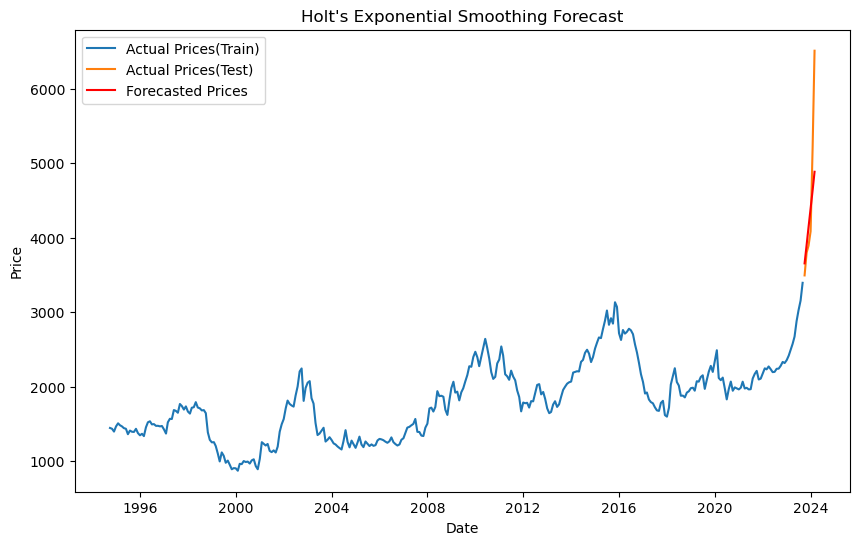

In [6]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing



# Sort the data by date 
data.sort_index(inplace=True)

# split the data into train and testing dataset
train = data.loc[:'2023-09']
test = data.loc['2023-10':'2024-03']



# Define the smoothing parameters (alpha and beta)
alpha = 1.2 
beta = 1.0   

# Apply Holt's Exponential Smoothing
model = ExponentialSmoothing(train['Price'], trend='add')
result = model.fit(smoothing_level=alpha, smoothing_trend=beta)

# Generate forecasts
# forecast period is  Number of periods into the future you want to forecast
forecast_period = 6  
forecast = result.forecast(forecast_period)

# Print or visualize the forecasts
print("Forecasted Prices:")
print(forecast)

# MSE to measure accuracy
mse = mean_squared_error(test['Price'], forecast)
print("MSE:",mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plotting the data and forecasts

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price'], label='Actual Prices(Train)')
plt.plot(test.index, test['Price'], label='Actual Prices(Test)')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Holt's Exponential Smoothing Forecast")
plt.legend()
plt.show()


## Arima forecasting

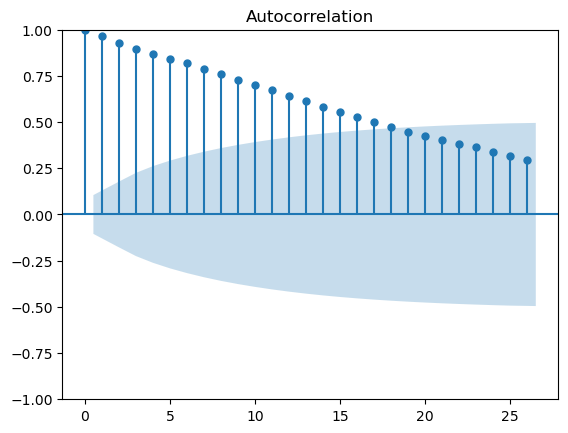

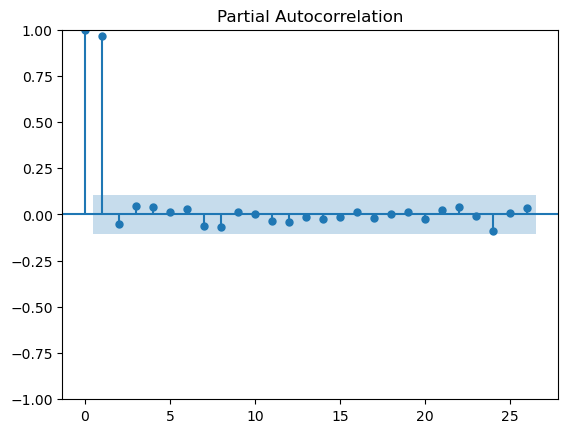

C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vishw\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  348
Model:                 ARIMA(2, 8, 8)   Log Likelihood               -2412.669
Date:                Mon, 06 May 2024   AIC                           4847.338
Time:                        20:15:41   BIC                           4889.456
Sample:                    10-01-1994   HQIC                          4864.120
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6805      0.255     -6.587      0.000      -2.181      -1.180
ar.L2         -0.9904      0.144     -6.858      0.000      -1.273      -0.707
ma.L1         -3.9596      0.387    -10.233      0.0

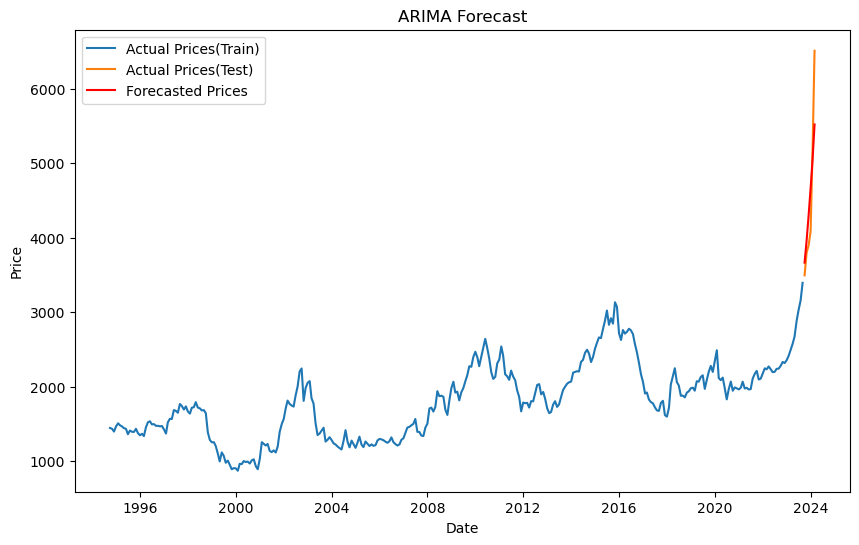

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


##spliting the data into training and testing data
train = data.loc[:'2023-09']
test = data.loc['2023-10':'2024-03']

##plotting autocorrelation and partial autocorrelation graph
plot_acf(train['Price'])
plot_pacf(train['Price'])
plt.show()


# Define the ARIMA model with chosen values of p, d, and q.
# For example, ARIMA(1, 1, 1) indicates an ARIMA model with AR order 1, differencing order 1, and MA order 1.
model = ARIMA(train['Price'], order=(2,8,8))
results = model.fit()

# ARIMA summary
print(results.summary())

#  Forecasting
forecast_steps = 6 
forecast = results.forecast(steps=forecast_steps)
print(forecast)


##MSE for accuracy
mse = mean_squared_error(test['Price'], forecast)
print("MSE:",mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Price'], label='Actual Prices(Train)')
plt.plot(test.index, test['Price'], label='Actual Prices(Test)')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

